# Version 0.4

Change the calculation methods for v_score and r_score. 
Select a strategy with a probability instead of selecting the best directly.

Only simulate for one sample at this time. Plot the number of people in bar and the r_score history, with different number of strateties and memory steps.

## No strategy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

N = 1001
iter_num = 1500
bar_people_num = np.zeros(iter_num)
home_num = np.zeros(iter_num)
for i in range(iter_num):
    for j in range(N):
        rd = randint(0, 1)
        if(rd == 1):
            bar_people_num[i] += 1
        else:
            home_num[i] += 1

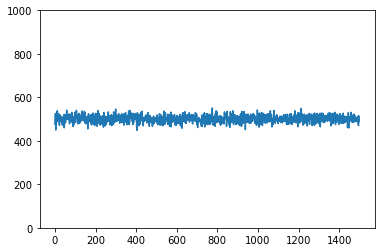

In [2]:
t_ax = [i for i in range(iter_num)]
plt.plot(t_ax, bar_people_num)
plt.ylim([0, 1000])
plt.show()

## With short-term memory

In [3]:
#number of agents
N=500

# num of strategies
s_list=[2,5,10,20]

# num of memory steps
m_list=[3,5,10,15]

In [4]:
"""
CHEN Xiaolong
2021.11.19
Class Encapsulate
El-Farol Bar problem
"""
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
from random import choice
from random import choices
class BarGame():
    def __init__(self, iter_num=500, N=100, m=3, s=4, cal_benefit=0):
        self.iter_num = iter_num
        self.N = N
        self.m = m
        self.s = s
        self.dim = 2**m
        self.cal_benefit = cal_benefit
        self.d_arr = np.random.randint(0, 2, (N, s, self.dim))
        self.v_score = np.zeros((N, s))
        self.r_score = np.zeros(N)
        self.num_bar = []
        self.r_score_history = [[] for i in range(N)]
    
    def runGame(self):
        mu = randint(0, self.dim-1)
        N = self.N
        for i in range(self.iter_num):
            num_going = 0
            decision = np.zeros(N)
            for ag in range(N):
                # find the best strategy 
                maxv = self.v_score[ag][0]
                choice_s = []
                for st in range(self.s):
                    if self.v_score[ag][st] > maxv:
                        maxv = self.v_score[ag][st]
                        choice_s.append(st)
                    elif self.v_score[ag][st] == maxv:
                        choice_s.append(st)
                cur_choice = choice(choice_s)
                decision[ag] = self.d_arr[ag][cur_choice][mu]
                if decision[ag] == 1:
                    num_going += 1
            self.num_bar.append(num_going)
            
            if self.cal_benefit == 0:
                benefit = self.calBenefit_0(num_going, N)
                self.update_score_non_neg(mu, benefit, decision)
            elif self.cal_benefit == 1:
                benefit = self.calBenefit_1(num_going, N)
                self.update_score_non_neg(mu, benefit, decision)
            elif self.cal_benefit == 2:
                benefit = self.calBenefit_2(num_going, N)
                self.update_score_neg(mu, benefit, decision)
            else:
                benefit = self.calBenefit_3(num_going, N)
                self.update_score_neg(mu, benefit, decision)
            w = 1 if benefit > 1 else 0
            # for ag in range(N):
            #     for i in range(self.s):
            #         if self.d_arr[ag][i][mu] == 1: # if go to bar, v_score add by benefit
            #             self.v_score[ag][i] += benefit#*(self.d_arr[ag][i][mu]) 
            #         elif self.d_arr[ag][i][mu] == 0: # if stay at home, v_score always add 1
            #             self.v_score[ag][i] += 1
            #     if decision[ag] == 1:
            #         self.r_score[ag] += benefit#*(decision[ag])
            #     elif decision[ag] == 0:
            #         self.r_score[ag] += 1
            #     self.r_score_history[ag].append(self.r_score[ag])
            mu = (mu*2+w)%self.dim

    def update_score_non_neg(self, mu, benefit, decision):
        for ag in range(self.N):
            for i in range(self.s):
                if self.d_arr[ag][i][mu] == 1: # if go to bar, v_score add by benefit
                    self.v_score[ag][i] += benefit #*(self.d_arr[ag][i][mu]) 
                elif self.d_arr[ag][i][mu] == 0: # if stay at home, v_score always add 1
                    self.v_score[ag][i] += 1
            if decision[ag] == 1:
                self.r_score[ag] += benefit #*(decision[ag])
            elif decision[ag] == 0:
                self.r_score[ag] += 1
            self.r_score_history[ag].append(self.r_score[ag])
    
    def update_score_neg(self, mu, benefit, decision):
        for ag in range(self.N):
            for i in range(self.s):
                self.v_score[ag][i] += benefit*(2*self.d_arr[ag][i][mu] - 1)
            self.r_score[ag] += benefit*(2*decision[ag]-1)
            self.r_score_history[ag].append(self.r_score[ag])

    def calBenefit_0(self, num_going, N):
        if num_going - int(N*0.6) > 0:  # if crowded, benefit < 1
            return 1 - (num_going - int(N*0.6))/N
        else:  # if not crowded, benefit > 1
            return 1 + (int(N*0.6) - num_going)/N
    
    def calBenefit_1(self, num_going, N):
        if num_going - int(N*0.6) > 0: # if crowded, benefit = 0
            return 0
        else:  # if not crowded, benefit = 2
            return 2
    
    def calBenefit_2(self, num_going, N):
        return (int(N*0.6) - num_going)/N

    def calBenefit_3(self, num_going, N):
        return -1 if num_going > int(N*0.6) else 1

    # def calBenefit_2(self, num_going, N):
    #     if num_going - int(N*0.6) > 0: # if crowded, benefit = 0
    #         return 0
    #     else:
    #         2/

    def getRealScore(self):
        return self.r_score
    
    def getScoreHistory(self):
        return self.r_score_history
    
    def getNumberofPeopleInBar(self):
        return np.array(self.num_bar)

In [5]:
# test_1 = BarGame(N=100, iter_num=10000, m=4, s=4, cal_benefit=3)
# test_1.runGame()
# plt.plot(test_1.getNumberofPeopleInBar())
# plt.ylim([0, test_1.N])
# plt.show()
# # plt.title(f"{s_list[i]} strategies")

## Assumption 1: Winners in bar> staying at home > losers in bar

## More crowded, more uncomfortable

In [6]:
# num of strategies
s_list=[2,5,10,20]

# num of memory steps
m_list=[3,5,10,15]

### Effect on number of strategies
number of memory step: 3

In [7]:
# simulations for 0
num_bar_01 = []
for s in s_list:
    cur_game = BarGame(s=s, cal_benefit=0)
    cur_game.runGame()
    num_bar = cur_game.getNumberofPeopleInBar()
    num_bar_01.append(num_bar)

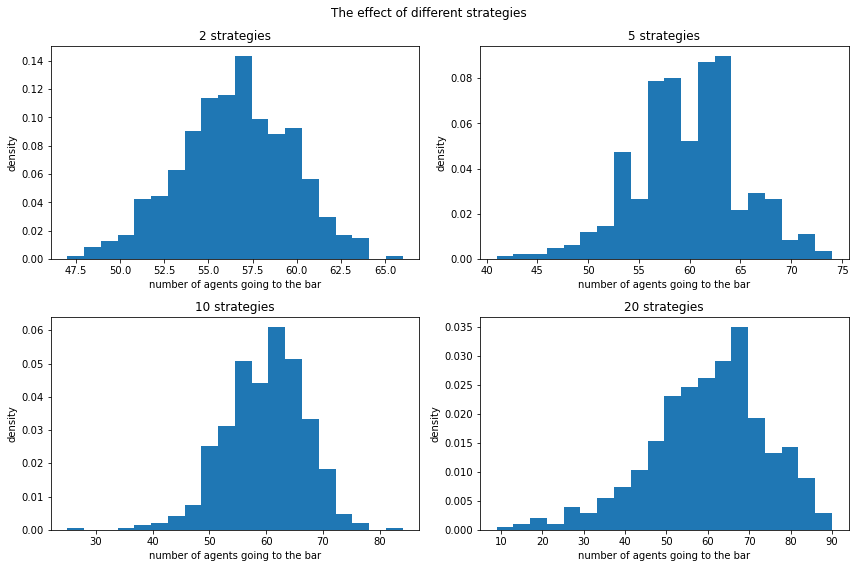

In [24]:
# plot number of people in bar density
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different strategies")
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_01[i],density=True,bins=20)
    plt.title(f"{s_list[i]} strategies")
    plt.xlabel("number of agents going to the bar")
    plt.ylabel("density")
plt.tight_layout()

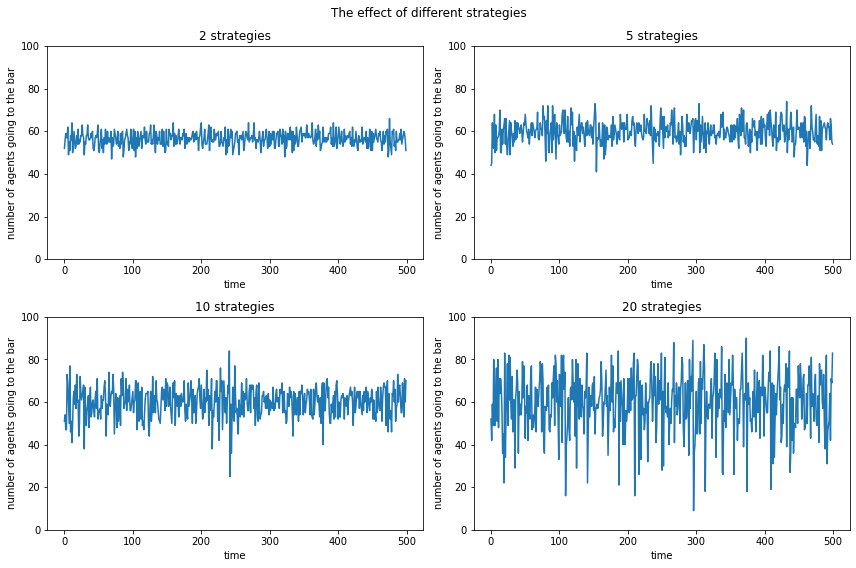

In [11]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different strategies")
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_01[i])
    plt.title(f"{s_list[i]} strategies")
    plt.ylim([0, 100])
    plt.xlabel("time")
    plt.ylabel("number of agents going to the bar")
plt.tight_layout()
plt.show()

### Effect on number of memory steps
number of strategies: 4

In [12]:
# simulations for 0
num_bar_02 = []
for m in m_list:
    cur_game = BarGame(s=4, m=m, cal_benefit=0)
    cur_game.runGame()
    num_bar = cur_game.getNumberofPeopleInBar()
    num_bar_02.append(num_bar)

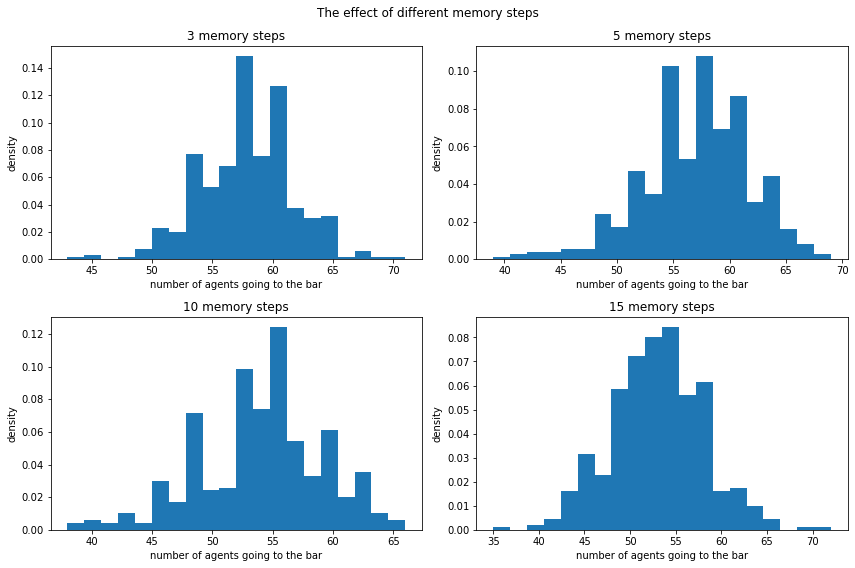

In [23]:
# plot number of people in bar density
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different memory steps")
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_02[i],density=True,bins=20)
    plt.title(f"{m_list[i]} memory steps")
    plt.xlabel("number of agents going to the bar")
    plt.ylabel("density")
plt.tight_layout()

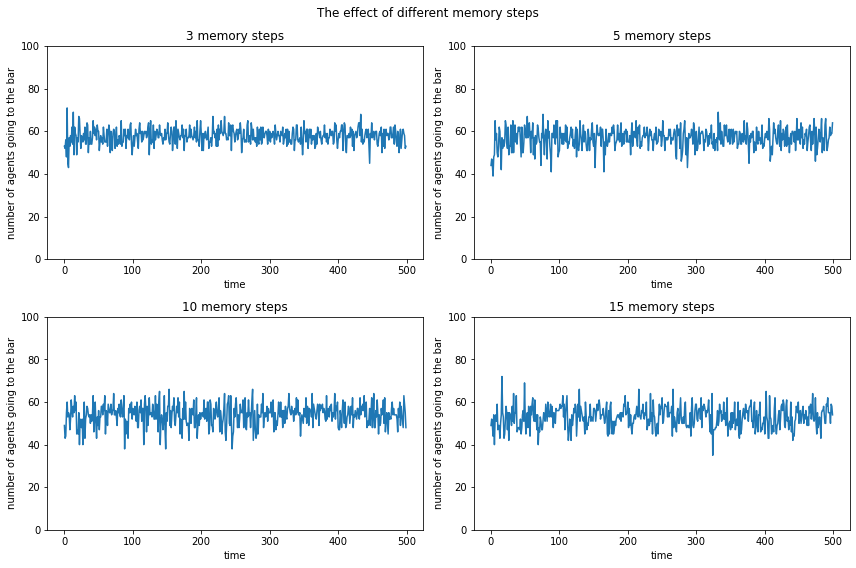

In [14]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different memory steps")
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_02[i])
    plt.title(f"{m_list[i]} memory steps")
    plt.ylim([0, 100])
    plt.xlabel("time")
    plt.ylabel("number of agents going to the bar")
plt.tight_layout()
plt.show()

## Once exceed 60, uncomfortable

### Effect on number of strategies
number of memory step: 3

In [15]:
# simulations for 1
num_bar_11 = []
for s in s_list:
    cur_game = BarGame(s=s, cal_benefit=1)
    cur_game.runGame()
    num_bar = cur_game.getNumberofPeopleInBar()
    num_bar_11.append(num_bar)

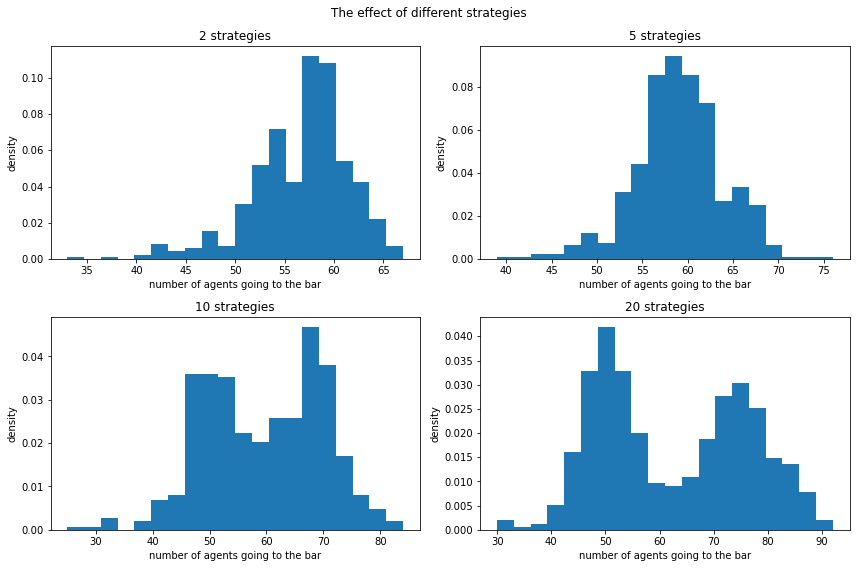

In [19]:
# plot number of people in bar density
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different strategies")
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_11[i],density=True,bins=20)
    plt.title(f"{s_list[i]} strategies")
    plt.xlabel("number of agents going to the bar")
    plt.ylabel("density")
plt.tight_layout()
plt.show()

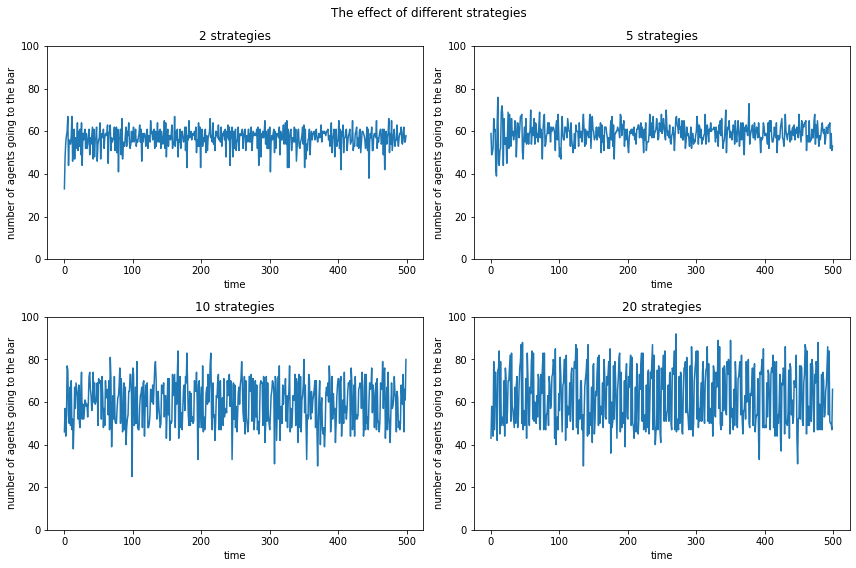

In [18]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different strategies")
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_11[i])
    plt.title(f"{s_list[i]} strategies")
    plt.ylim([0, 100])
    plt.xlabel("time")
    plt.ylabel("number of agents going to the bar")
plt.tight_layout()
plt.show()

### Effect on memory steps
number of memory step: 3

In [20]:
# simulations for 0
num_bar_12 = []
for m in m_list:
    cur_game = BarGame(m=m, cal_benefit=0)
    cur_game.runGame()
    num_bar = cur_game.getNumberofPeopleInBar()
    num_bar_12.append(num_bar)

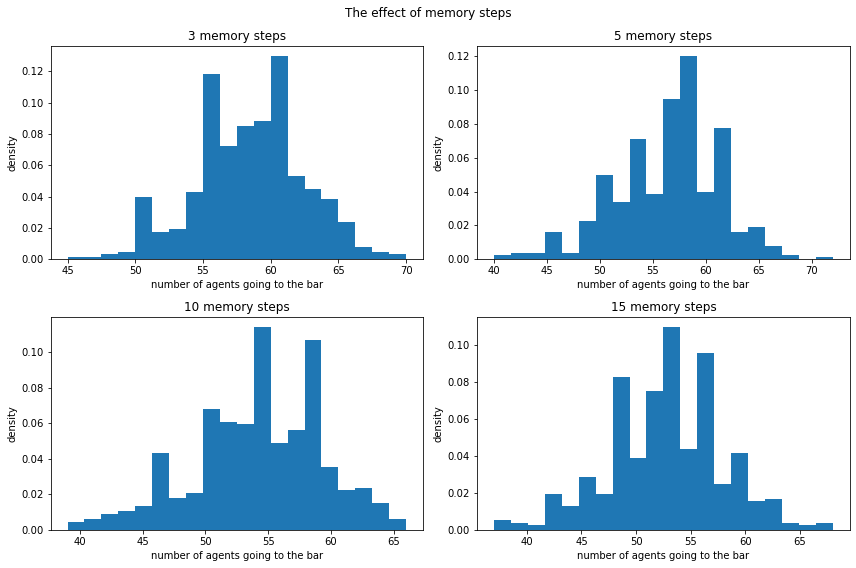

In [22]:
# plot number of people in bar density
plt.figure(figsize=(12,8))
plt.suptitle("The effect of memory steps")
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_12[i],density=True,bins=20)
    plt.title(f"{m_list[i]} memory steps")
    plt.xlabel("number of agents going to the bar")
    plt.ylabel("density")
plt.tight_layout()
plt.show()

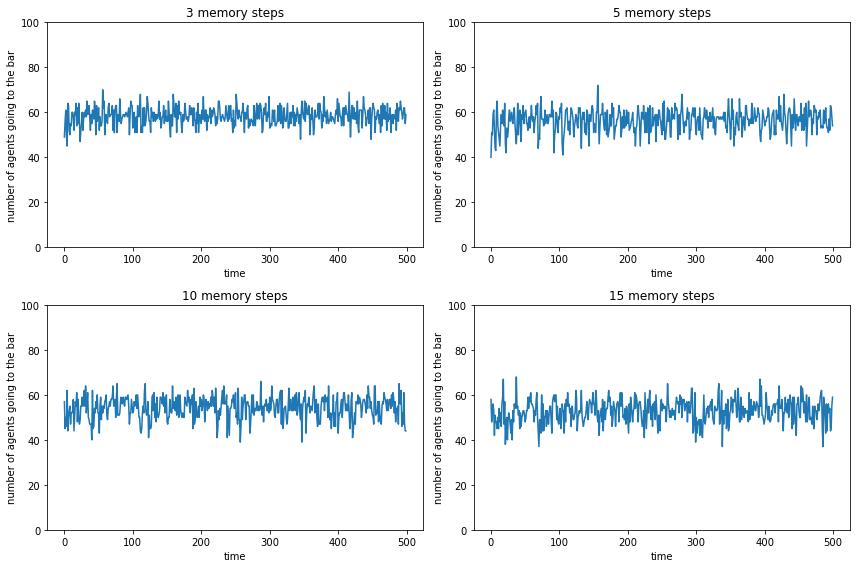

In [21]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_12[i])
    plt.title(f"{m_list[i]} memory steps")
    plt.ylim([0, 100])
    plt.xlabel("time")
    plt.ylabel("number of agents going to the bar")
plt.tight_layout()
plt.show()